# Pattern Recognition Assignment 3.

## Μωράτης Κωνσταντίνος, 9589.

### Part A:

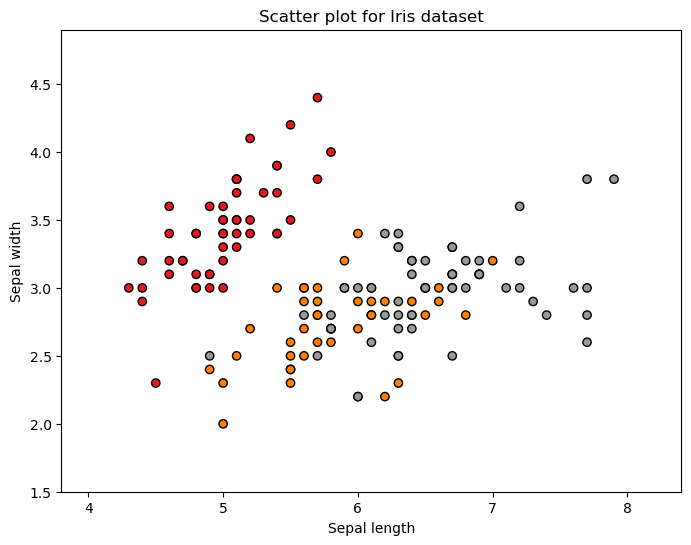

In [243]:
# Decision Tree Classifier
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# import the data
iris = datasets.load_iris()
X = iris.data[:, :2]  # we use only the first two features.
y = iris.target

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the data points (training + testing)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Scatter plot for Iris dataset")

# Specify limits for plot axis
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split dataset to training and testing
X_train = X[0:25,:]
X_train = np.concatenate((X_train, X[50:75,:]))
X_train = np.concatenate((X_train, X[100:125,:]))
y_train = y[0:25]
y_train = np.concatenate((y_train, y[50:75]))
y_train = np.concatenate((y_train, y[100:125]))

X_test = X[25:50,:]
X_test = np.concatenate((X_test, X[75:100,:]))
X_test = np.concatenate((X_test, X[125:150,:]))
y_test = y[25:50]
y_test = np.concatenate((y_test, y[75:100]))
y_test = np.concatenate((y_test, y[125:150]))

depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
best_accuracy = 0
best_depth = 0

for d in depths:
    # create Decision Tree and fit to training data
    clf = DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X_train, y_train)

    # predict y using the Decision Tree for testing data
    predictions = clf.predict(X_test)
    # calculate accuracy
    acc = accuracy_score(y_test, predictions)
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = d
        
print("Best depth =", best_depth, ", Accuracy =", best_accuracy)

Best depth = 6 , Accuracy = 0.8


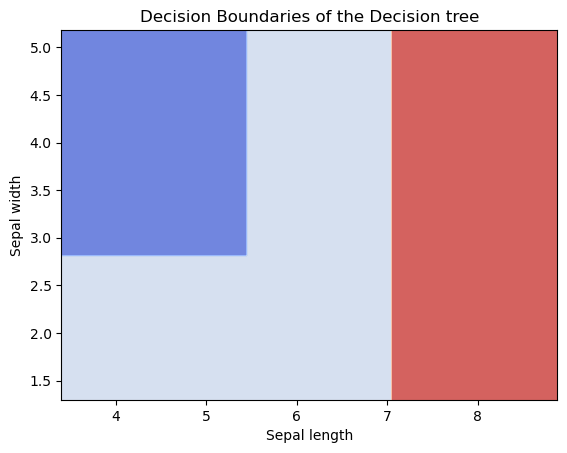

In [288]:
# create Decision Tree with the best depth and fit to training data
best_clf = DecisionTreeClassifier(max_depth=best_depth)
best_clf = best_clf.fit(X_train, y_train)

# create a meshgrid for plot
h = .02  # step
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1 # x1 feature
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1 # x2 feature
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

# predict y using the best classifier
Y = best_clf.predict(np.c_[xx1.ravel(), xx2.ravel()]) # label y

Y = Y.reshape(xx1.shape)
# plot the decision boundaries using contourf
plt.contourf(xx1, xx2, Y, cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("Decision Boundaries of the Decision tree")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.show()

### Part B:

In [286]:
# Random Forest implementation
import random
import statistics

n_bootstraps = 100
g = 0.5
len_A = len(X_train)
len_bootstrap = round(g * len_A) #len_bootstrap = 38 ~ 0.5*75
b_X = np.empty([len_bootstrap, 2])
b_y = np.empty([len_bootstrap])
random.seed(10)

# Train 100 Decision Tree Classifiers, using the 100 bootstrap samples
acc = 0
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
best_accuracy = 0
best_depth = 0
m = len(X_test)
predictions = np.empty([m, n_bootstraps]) # array 75x100
com_pred = np.empty(m)

for d in depths:
    # create Decision Tree and fit to training data
    clf = DecisionTreeClassifier(max_depth=d)
    
    # create bootstrap samples x,y
    for i in range(n_bootstraps):
        for k in range(len_bootstrap):
            p = random.randrange(len_A)
            b_X[k, :] = X_train[p,:] # b_samples_X: (g*75)x2 containing (x1, x2) pairs. 
            b_y[k] = y_train[p] # b_samples_y: (g*75)x1 containing y.
        
        clf = clf.fit(b_X, b_y)

        # predict y using the Decision Tree for testing data
        predictions[:,i] = clf.predict(X_test)
    
    # calculating (mean) prediction from all the Decision Trees committee
    for i in range(m):
        unique, counts = np.unique(predictions[i,:], return_counts=True)
        max_index = np.argmax(counts)
        
        com_pred[i] = unique[max_index]
    
    # calculate accuracy
    acc = accuracy_score(y_test, com_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = d
    
print("Best depth =", best_depth, ", Accuracy =", best_accuracy)

Best depth = 2 , Accuracy = 0.8


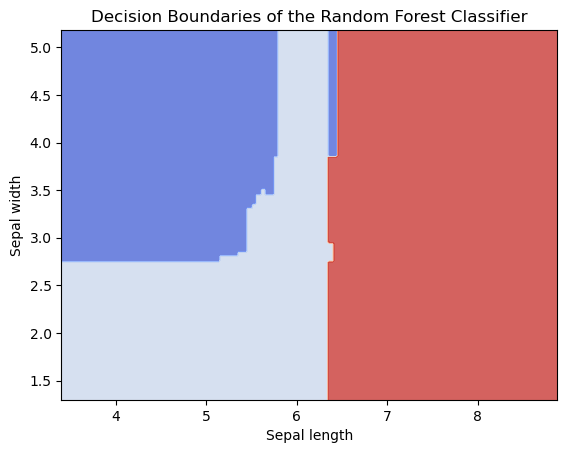

In [324]:
# create Random Forest with the best depth and fit to training data
clf = DecisionTreeClassifier(max_depth=best_depth)  
    
# create a meshgrid for plot
h = .02  # step
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1 # x1 feature
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1 # x2 feature
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

d1 = len(xx1)
d2 = len(xx1[0])
Y = np.empty([d1, d2, n_bootstraps])
com_pred = np.empty([d1, d2])
    
# create bootstrap samples x,y
for i in range(n_bootstraps):
    # create bootstrap sample (i)
    for k in range(len_bootstrap):
        p = random.randrange(len_A)
        b_X[k, :] = X_train[p,:] # b_samples_X: 38x2 containing of 38 (x1, x2) pairs. 
        b_y[k] = y_train[p] # b_samples_y: 38x1 containing 38 y.

    # Decision tree trained on bootstrap sample (i)
    clf = clf.fit(b_X, b_y)

    # predict y using the Decision Tree (i)
    Y[:,:,i] = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    
# calculating (mean) prediction from all the Decision Trees committee
for i in range(d1):
    for j in range(d2):
        unique, counts = np.unique(Y[i,j,:], return_counts=True)
        max_index = np.argmax(counts)

        com_pred[i,j] = unique[max_index]   

# plot the decision boundaries using contourf
plt.contourf(xx1, xx2, com_pred, cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("Decision Boundaries of the Random Forest Classifier")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.show()


In [332]:
# g parameter

g_arr = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
len_A = len(X_train)
n_bootstraps = 100

for g in g_arr:
    len_bootstrap = round(g * len_A) #len_bootstrap = 38 ~ 0.5*75
    b_X = np.empty([len_bootstrap, 2])
    b_y = np.empty([len_bootstrap])
    
    # Train 100 Decision Tree Classifiers, using the 100 bootstrap samples
    acc = 0
    depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    best_accuracy = 0
    best_depth = 0
    m = len(X_test)
    predictions = np.empty([m, n_bootstraps]) # array 75x100
    com_pred = np.empty(m)

    for d in depths:
        # create Decision Tree and fit to training data
        clf = DecisionTreeClassifier(max_depth=d)

        # create bootstrap samples x,y
        for i in range(n_bootstraps):
            for k in range(len_bootstrap):
                p = random.randrange(len_A)
                b_X[k, :] = X_train[p,:] # b_samples_X: (g*75)x2 containing (x1, x2) pairs. 
                b_y[k] = y_train[p] # b_samples_y: (g*75)x1 containing y.

            clf = clf.fit(b_X, b_y)

            # predict y using the Decision Tree for testing data
            predictions[:,i] = clf.predict(X_test)

        # calculating (mean) prediction from all the Decision Trees committee
        for i in range(m):
            unique, counts = np.unique(predictions[i,:], return_counts=True)
            max_index = np.argmax(counts)

            com_pred[i] = unique[max_index]

        # calculate accuracy
        acc = accuracy_score(y_test, com_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_depth = d
    
    print("For g:", g, "Best depth =", best_depth, ", Accuracy =", best_accuracy)


For g: 0.05 Best depth = 4 , Accuracy = 0.8266666666666667
For g: 0.1 Best depth = 6 , Accuracy = 0.8266666666666667
For g: 0.25 Best depth = 13 , Accuracy = 0.8266666666666667
For g: 0.5 Best depth = 3 , Accuracy = 0.8
For g: 0.75 Best depth = 2 , Accuracy = 0.8
For g: 1 Best depth = 3 , Accuracy = 0.7733333333333333
